# Module 2
### Welcome to the Answer notebook for Module 2 !



In [0]:
!pip install -U -q pydrive

     |████████████████████████████████| 993kB 2.9MB/s 


In [0]:
#this notebook is written in google colab

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
csv_link= "https://drive.google.com/open?id=1gf39mkMCsAaD6BfjMVwuEOf5TESv2Y_1"
fluff, id= csv_link.split('=')
print(id)

1gf39mkMCsAaD6BfjMVwuEOf5TESv2Y_1


## Query 2.1

    Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
    
    Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is:
    
          -- Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
          -- This would be helpful if we are to train our model to take NLP inputs.

In [0]:
csv_link= "https://drive.google.com/open?id=1gf39mkMCsAaD6BfjMVwuEOf5TESv2Y_1"
fluff, id= csv_link.split('=')
print(id)

import pandas as pd
downloaded= drive.CreateFile({'id' : id})
downloaded.GetContentFile('week2.csv')

#to import the csv files of stocks and save it as a dataframe 
data= pd.read_csv('week2.csv')

1gf39mkMCsAaD6BfjMVwuEOf5TESv2Y_1


**This notebook is written in google Colab thus pydrive authentication is used,  in case of local machine just use    data= pd.read_csv("week2.csv")**

In [0]:
#import libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#we will be using seaborn and matplotlib for plotting purposes

import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,8)    #to fix the size of our graph for better visualization.
import seaborn as sn

In [0]:
type(data['Date'][1])

str

**We can see that each entry in data["Date"] is of str type, we will convert them to datetime object**

In [0]:
data['Date']= pd.to_datetime(data['Date'])

**We converted elements data["Date"] Series to datatime64(ns) type to make use of Pandas functionality for dates.**

In [0]:
#set_index will make our column as our index.
data.set_index('Date', inplace= True)

**Converted the Date column to the index of the dataframe.**

In [0]:
data.head(3)

data['Close Price'].head()

Date
2017-05-15    4614.05
2017-05-16    4589.80
2017-05-17    4637.25
2017-05-18    4544.45
2017-05-19    4522.70
Name: Close Price, dtype: float64

**Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.**

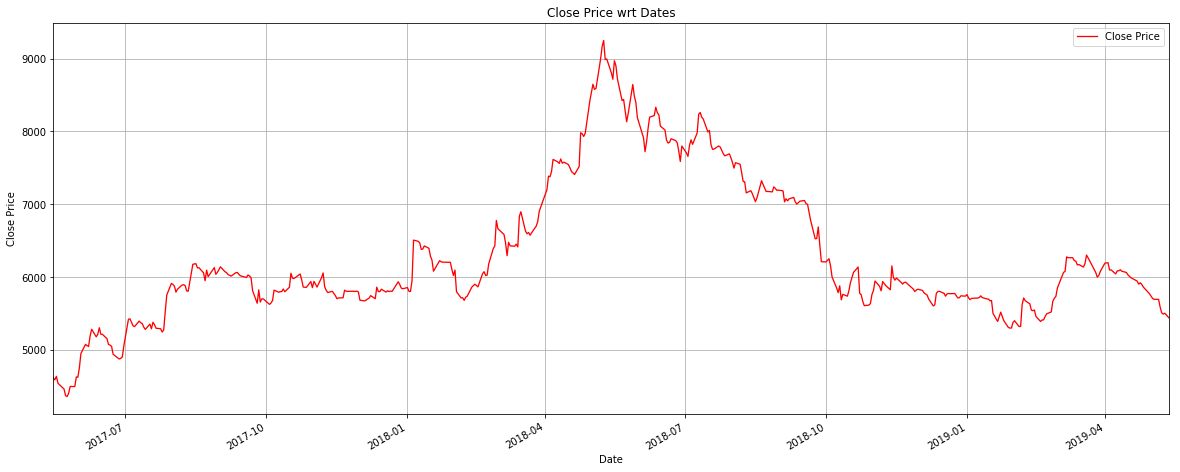

In [0]:
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, title='Close Price wrt Dates', ylabel='Close Price')
data['Close Price'].plot(ax=ax1, color='r', lw=1.3, grid= True)
plt.legend(['Close Price'])

In [0]:
'''
plt.title('Close Price wrt Dates')
sns.set_style("darkgrid")
palette = sns.color_palette("mako_r", 3)
sns.lineplot(x= data.index, y= 'Close Price',  
              hue='year', palette= palette, 
                legend="full", data= data, linewidth='1.4')
'''



---


##Query 2.2

    A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

    Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

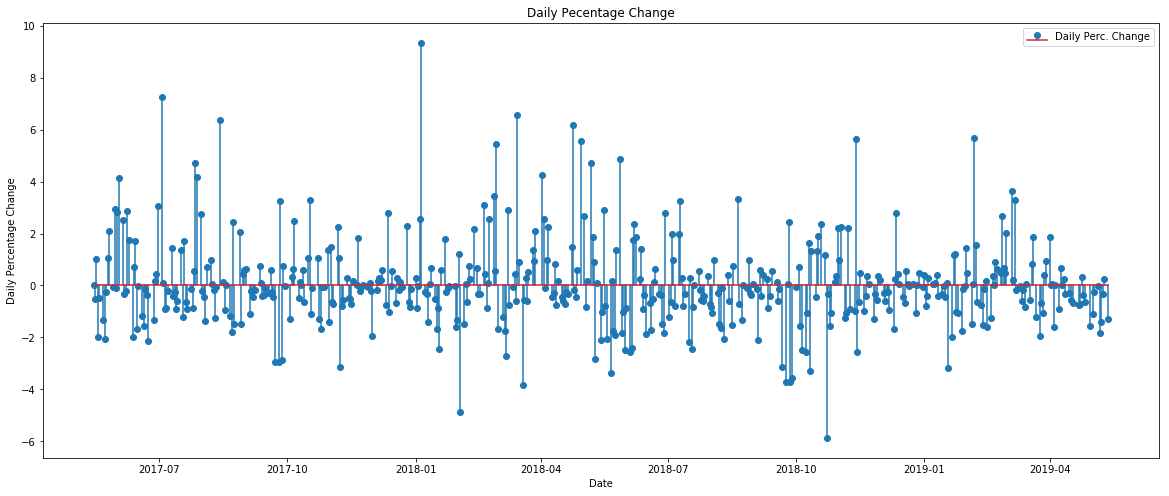

In [0]:
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, title='Daily Pecentage Change', xlabel= 'Date', ylabel='Daily Percentage Change')
ax1= plt.stem(data.index, data["Day_Perc_Change"], 
         linefmt=None, markerfmt=None, basefmt=None)

plt.legend(['Daily Perc. Change'])



---


## Query 2.3 

    Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

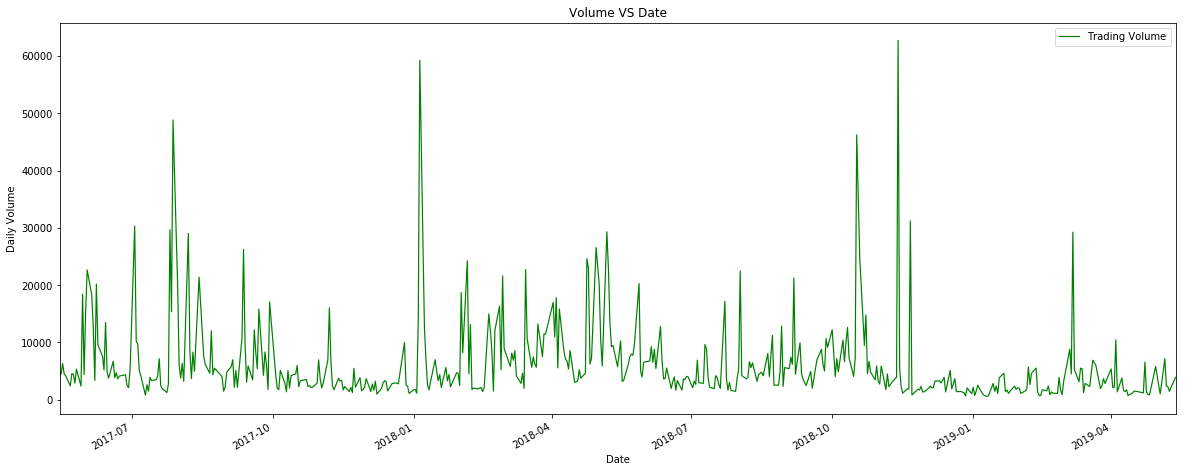

In [0]:
import matplotlib.patches as mpatches
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, title='Volume VS Date', ylabel='Daily Volume')
data['Total Traded Quantity'].plot(ax=ax1, color='g', lw=1.2)
#labs = mpatches.Patch(color='red',alpha=.5, label="Highest Trading Volume")
plt.legend(['Trading Volume'])

In [0]:
'''
plt.title('Daily Trading Volume')
sns.set_style("darkgrid")
palette = sns.color_palette("mako_r", 3)
ax= sns.lineplot(x= data.index, y= 'Total Traded Quantity',  
              hue='year', palette= palette, 
                legend="full", data= data, linewidth='1.4')
'''

'\nplt.title(\'Daily Trading Volume\')\nsns.set_style("darkgrid")\npalette = sns.color_palette("mako_r", 3)\nax= sns.lineplot(x= data.index, y= \'Total Traded Quantity\',  \n              hue=\'year\', palette= palette, \n                legend="full", data= data, linewidth=\'1.4\')\n'

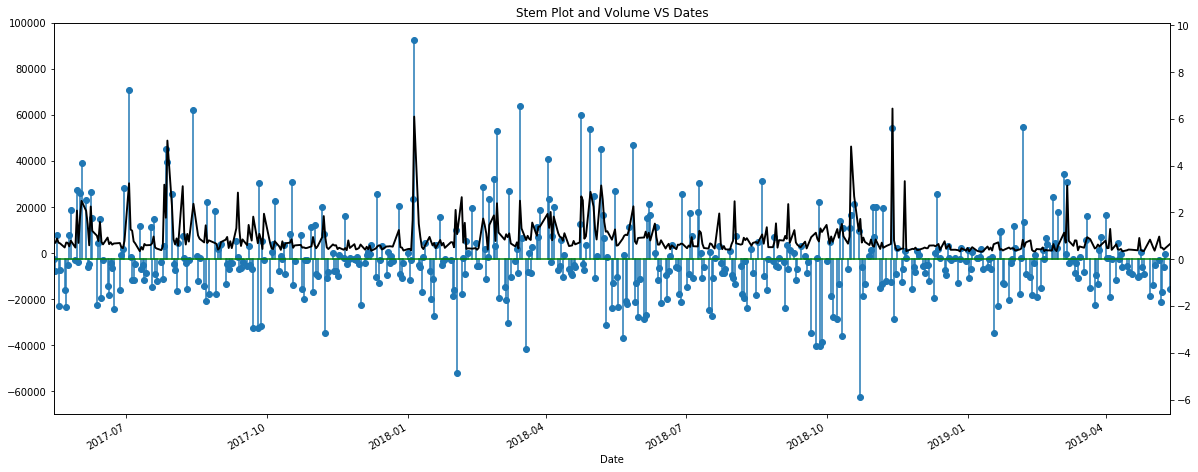

In [0]:
'''
color='black'
ax= sns.set_style("darkgrid")
palette= sns.dark_palette(color, n_colors=3, reverse=False, as_cmap=False, input='rgb')
ax1= sns.lineplot(x= data.index, y= 'Total Traded Quantity', hue= 'year',
               palette= palette, legend=None, data= data, linewidth='1.8')

'''
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, title='Stem Plot and Volume VS Dates')
data['Total Traded Quantity'].plot(ax=ax1, color='k', lw=1.9, grid= False)

ax1.set_ylim(-70000, 100000)
ax1.tick_params(axis='x')

ax2 = ax1.twinx()

ax1.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2 
ax1.patch.set_visible(False)                       

# instantiate a second axes that shares the same x-axis
ax2= plt.stem(data.index, data["Day_Perc_Change"], linefmt=None, markerfmt=None, basefmt='g-')



---


## Query 2.4 

    We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

In [0]:
#new dataframe
group_by_trend= data.groupby([(data['trend'])])

In [0]:
group_by_trend['Total Traded Quantity'].count()

trend
Among Top Gainers       22
Among Top Losers        11
Bull run                 2
Negative                91
Positive                66
Slight Negative         71
Slight Positive         42
Slight or No Change    189
Name: Total Traded Quantity, dtype: int64

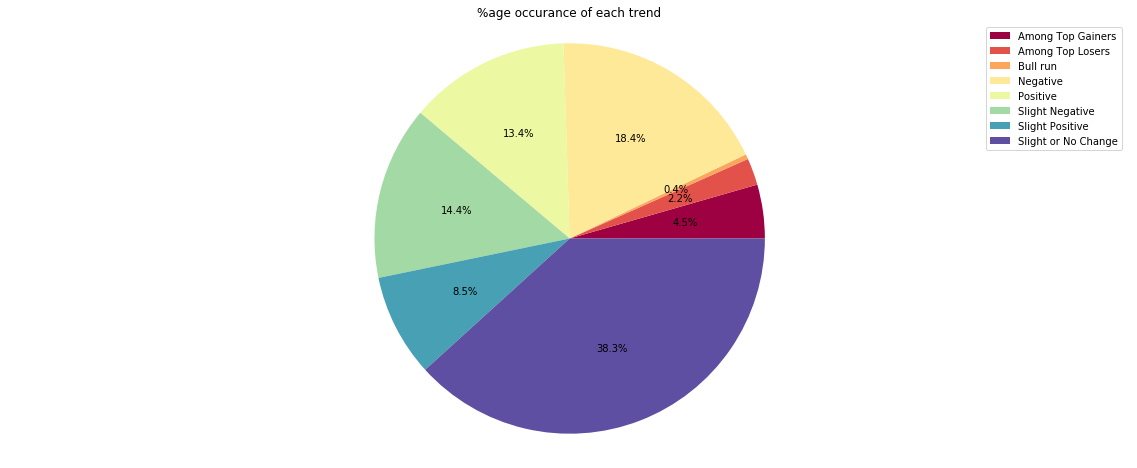

In [0]:
fig1, ax1 = plt.subplots()

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

labels = 'Among Top Gainers', 'Among Top Losers', 'Bull run',  'Negative', 'Positive', 'Slight Negative', 'Slight Positive', 'Slight or No Change' 

ax1.pie(group_by_trend['Total Traded Quantity'].count(), explode=None, colors= colors, labels= None, autopct='%1.1f%%',
          shadow=False, startangle=0)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("%age occurance of each trend")

fig1.set_label('Trend')
plt.legend(labels)
  
plt.show()

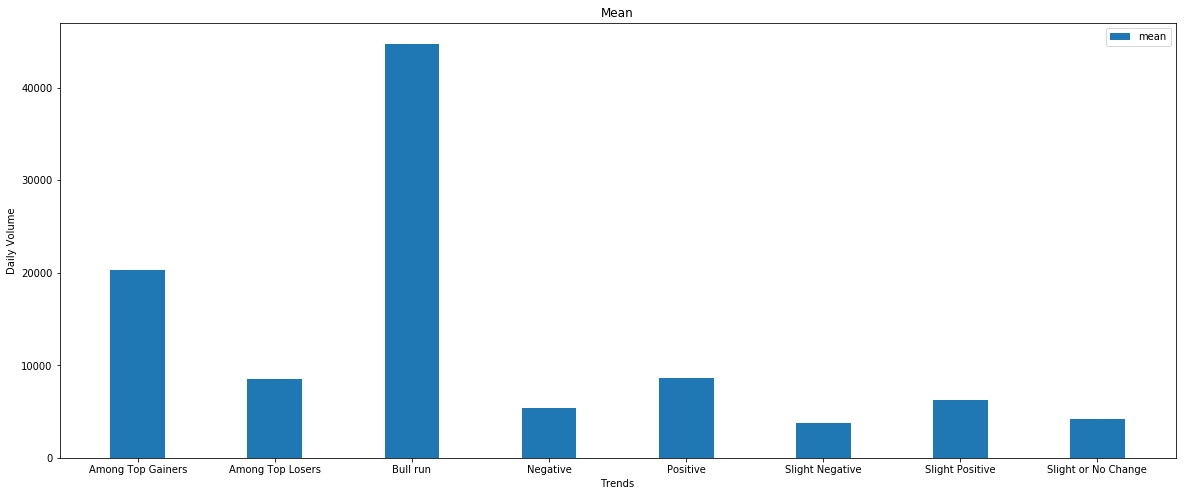

In [0]:
fig = plt.figure()

# Add a subplot and label for y-axis
fig.add_subplot(111, title='Mean', ylabel='Daily Volume',  xlabel='Trends')

plt.bar(labels, group_by_trend['Total Traded Quantity'].mean()[:].values, width= 0.4)
plt.legend(['mean'])

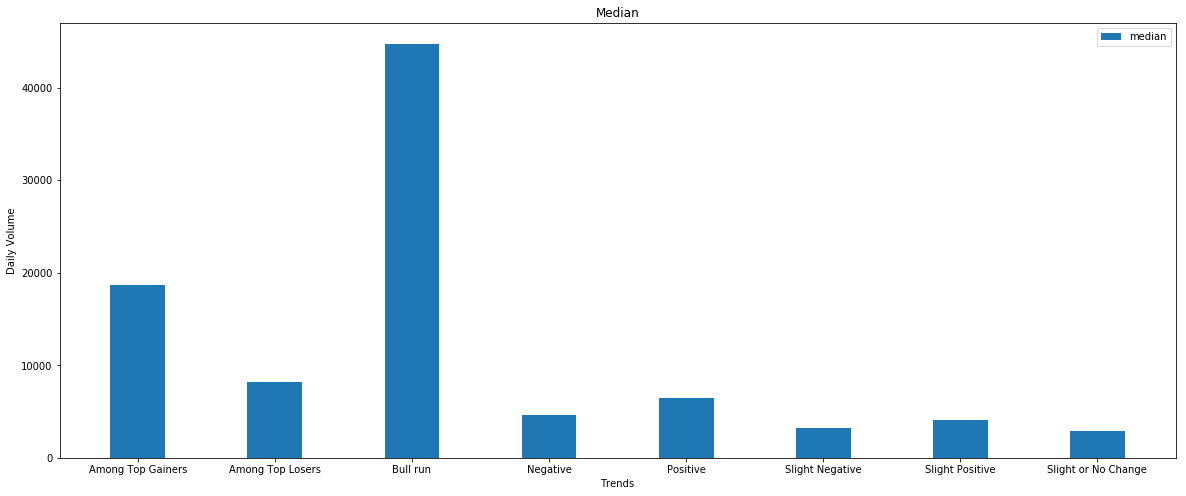

In [0]:
fig = plt.figure()

# Add a subplot and label for y-axis
fig.add_subplot(111, title='Median', ylabel='Daily Volume', xlabel='Trends')

plt.bar(labels, group_by_trend['Total Traded Quantity'].median()[:].values, width= 0.4)
plt.legend(['median'])



---


## Query 2.5 
    
    Plot the daily return (percentage) distribution as a histogram.
    Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

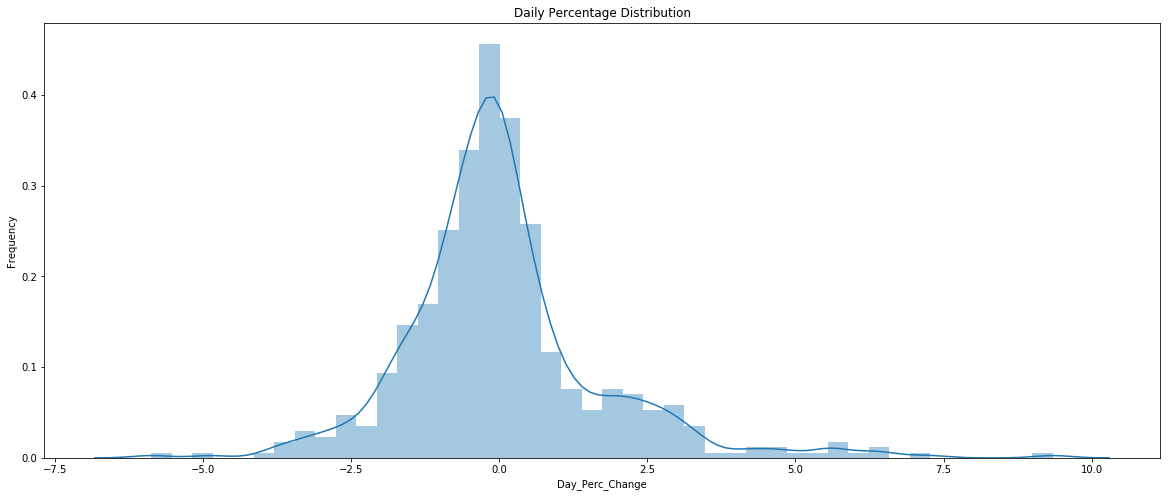

In [0]:
n_bins= 20
fig = plt.figure()

# Add a subplot and label for y-axis
fig.add_subplot(111, title='Daily Percentage Distribution', ylabel='Frequency', xlabel='Daily Percentage Chnage')

#plt.hist(data['Day_Perc_Change'], bins=n_bins)
sns.distplot(data['Day_Perc_Change'])

# Data

In [0]:
csv_link= "https://drive.google.com/open?id=1tx5NfRR3qG8PG6nEglSzVzNacrchMF34"
fluff, id= csv_link.split('=')
print(id)

downloaded= drive.CreateFile({'id' : id})
downloaded.GetContentFile('ADANIPOWER.csv')

#to import the csv files of stocks and save it as a dataframe 
data_adani= pd.read_csv('ADANIPOWER.csv')
print("Data sucessfully loaded")

1tx5NfRR3qG8PG6nEglSzVzNacrchMF34
Data sucessfully loaded


In [0]:
csv_link= "https://drive.google.com/open?id=1Y_MhGNal9M9slGHWvvnb2EaHhsb44l5O"
fluff, id= csv_link.split('=')
print(id)

downloaded= drive.CreateFile({'id' : id})
downloaded.GetContentFile('VOLTAS.csv')

#to import the csv files of stocks and save it as a dataframe 
data_voltas= pd.read_csv('VOLTAS.csv')
print("Data sucessfully loaded")

1Y_MhGNal9M9slGHWvvnb2EaHhsb44l5O
Data sucessfully loaded


In [0]:
csv_link= "https://drive.google.com/open?id=1vPWqrKNvRoVh9rMyKkVKavXTAiJB0_vV"
fluff, id= csv_link.split('=')
print(id)

downloaded= drive.CreateFile({'id' : id})
downloaded.GetContentFile('RAYMOND.csv')

#to import the csv files of stocks and save it as a dataframe 
data_raymond= pd.read_csv('RAYMOND.csv')
print("Data sucessfully loaded")

1vPWqrKNvRoVh9rMyKkVKavXTAiJB0_vV
Data sucessfully loaded


In [0]:
csv_link= "https://drive.google.com/open?id=1P7Q_4GXUd3iZYYeMXAnXFRsOrVt3Nyrx"
fluff, id= csv_link.split('=')
print(id)

downloaded= drive.CreateFile({'id' : id})
downloaded.GetContentFile('IDBI.csv')

#to import the csv files of stocks and save it as a dataframe 
data_idbi= pd.read_csv('IDBI.csv')
print("Data sucessfully loaded")

1P7Q_4GXUd3iZYYeMXAnXFRsOrVt3Nyrx
Data sucessfully loaded


In [0]:
csv_link= "https://drive.google.com/open?id=1nZq75F4WqSY1U2ZnI5DTXZqnDO0wQpGx"
fluff, id= csv_link.split('=')
print(id)

downloaded= drive.CreateFile({'id' : id})
downloaded.GetContentFile('Nifty50.csv')

#to import the csv files of stocks and save it as a dataframe 
data_Nifty50= pd.read_csv('Nifty50.csv')
print("Data sucessfully loaded")

1nZq75F4WqSY1U2ZnI5DTXZqnDO0wQpGx
Data sucessfully loaded


In [0]:
data_corr= pd.DataFrame(columns= ['data Laxmi', 'data_Adani', 'data_Raymond', 'data_Voltas', 'data_idbi', 'data_Nifty50'])

In [0]:
data_corr['data_Laxmi']= data['Close Price']
data_corr['data_Adani']= data_adani['Close Price']
data_corr['data_Raymond']= data_raymond['Close Price']
data_corr['data_Voltas']= data_voltas['Close Price']
data_corr['data_idbi']= data_idbi['Close Price']
data_corr['data_Nifty50']= data_Nifty50['Close']

In [0]:
data_corr.head()

,data Laxmi,data_Adani,data_Raymond,data_Voltas,data_idbi,data_Nifty50


In [0]:
data_corr.describe()

,data_Adani,data_Raymond,data_Voltas,data_idbi,data_Nifty50,data_Laxmi
count,494.000000,494.000000,494.000000,494.000000,494.000000,0.0
mean,34.426417,857.047065,562.532591,58.446862,10574.617308,NaN
std,10.031449,119.766977,52.485292,8.168467,567.090953,NaN
min,15.450000,600.450000,409.850000,34.450000,9360.550000,NaN
25%,27.350000,774.575000,527.000000,55.112500,10166.887500,NaN
50%,32.350000,817.300000,552.850000,59.450000,10584.725000,NaN
75%,41.487500,946.125000,612.825000,61.987500,10892.812500,NaN
max,57.850000,1132.400000,668.550000,84.650000,11787.150000,NaN


In [0]:
data_corr_change= (data_corr.pct_change() * 100).fillna(0)  

In [0]:
data_corr_change.describe()

,data_Adani,data_Raymond,data_Voltas,data_idbi,data_Nifty50,data_Laxmi
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,0.120895,0.027730,0.075652,-0.117226,0.036147,0.047080
std,3.842093,2.289617,1.940432,2.855695,0.719891,1.682300
min,-18.514751,-8.293210,-6.193684,-8.274399,-2.668113,-5.872291
25%,-1.904535,-1.190769,-1.084387,-1.443931,-0.394895,-0.813051
50%,-0.124651,0.036464,-0.026064,-0.114488,0.056653,-0.128510
75%,1.826512,1.067778,1.110605,1.062238,0.527771,0.583554
max,25.260960,11.952127,8.942296,19.981584,2.323968,9.346517


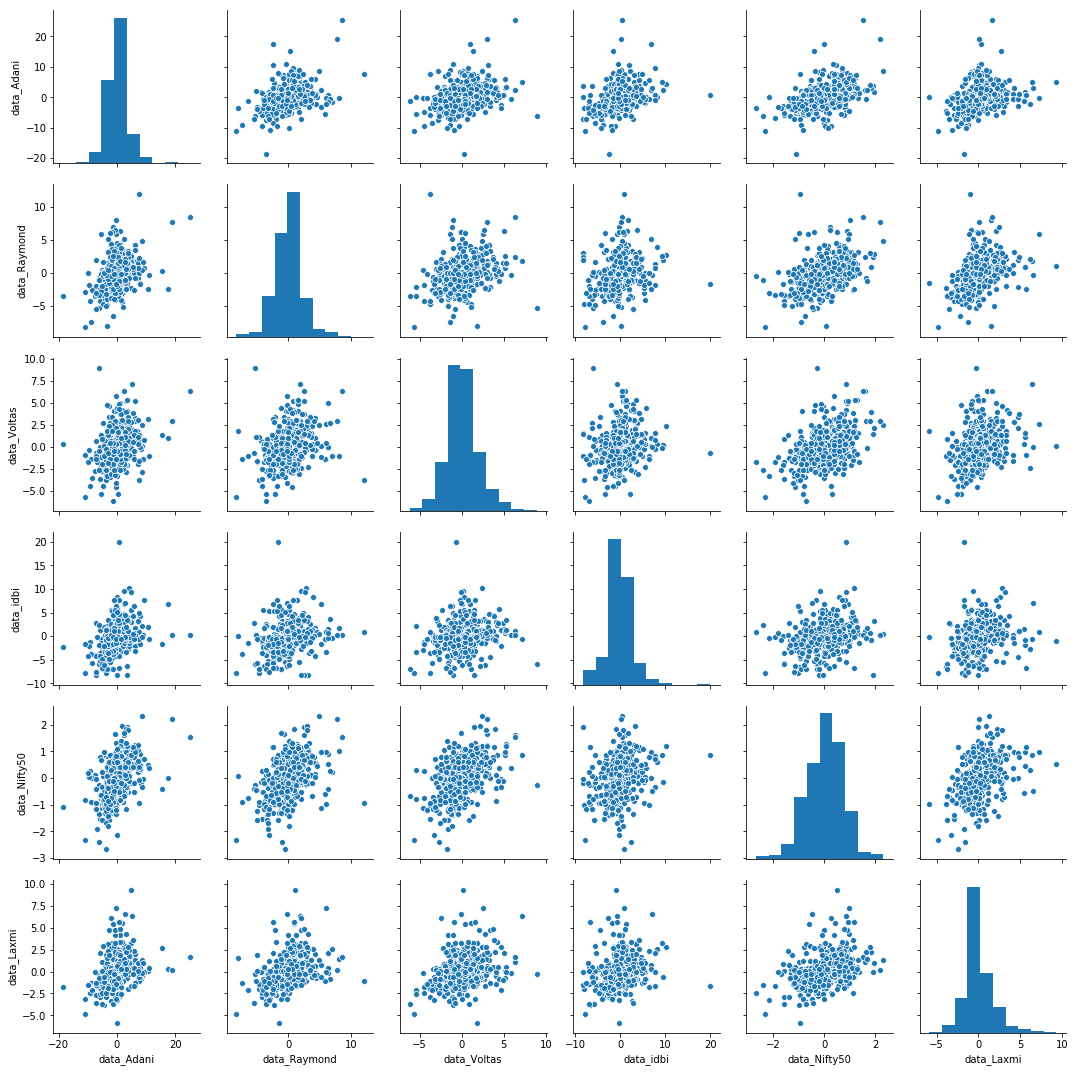

In [0]:
sns.pairplot(data_corr_change)



---


## Query 2.8
    
    Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

In [0]:
data_corr_change['MA_7_Laxmi']= data_corr_change['data_Laxmi'].rolling(window= 7).std() *   np.sqrt(7)
data_corr_change['MA_7_Nifty']= data_corr_change['data_Nifty50'].rolling(window= 7).std() * np.sqrt(7)
data_corr_change['MA_7_Voltas']= data_corr_change['data_Voltas'].rolling(window= 7).std() * np.sqrt(7)

In [0]:
data.describe()

,Unnamed: 0,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,pr_vol,Day_Perc_Change
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,246.500000,6282.411640,6292.694332,6381.254251,6209.717105,6282.211437,6284.197267,6292.729899,6104.172065,3.936248e+07,1340.325911,3778.125506,63.735931,6.485830,2017.858300,3.936248e+07,0.047080
std,142.749781,977.684756,979.732187,995.233583,956.189419,973.272163,975.321352,976.206285,7039.116612,4.608108e+07,1213.791291,4777.258890,12.650891,3.455131,0.694927,4.608108e+07,1.682300
min,0.000000,4360.350000,4336.550000,4416.000000,4316.500000,4355.000000,4360.350000,4390.880000,566.000000,3.239942e+06,218.000000,384.000000,27.610000,1.000000,2017.000000,3.239942e+06,-5.872291
25%,123.250000,5714.962500,5724.212500,5789.000000,5672.062500,5717.137500,5714.962500,5722.772500,2201.000000,1.314080e+07,591.250000,1480.750000,55.610000,4.000000,2017.000000,1.314080e+07,-0.813051
50%,246.500000,5948.675000,5967.650000,6050.000000,5875.000000,5946.000000,5948.675000,5950.125000,3954.000000,2.464435e+07,976.500000,2463.500000,64.075000,6.500000,2018.000000,2.464435e+07,-0.128510
75%,369.750000,6774.900000,6745.275000,6893.000000,6607.825000,6785.750000,6774.900000,6749.005000,6892.750000,4.496040e+07,1645.000000,4223.750000,71.877500,9.000000,2018.000000,4.496041e+07,0.583554
max,493.000000,9249.900000,9300.000000,9383.550000,9106.000000,9236.000000,9249.900000,9282.660000,62697.000000,3.794485e+08,12808.000000,56218.000000,97.880000,12.000000,2019.000000,3.794483e+08,9.346517


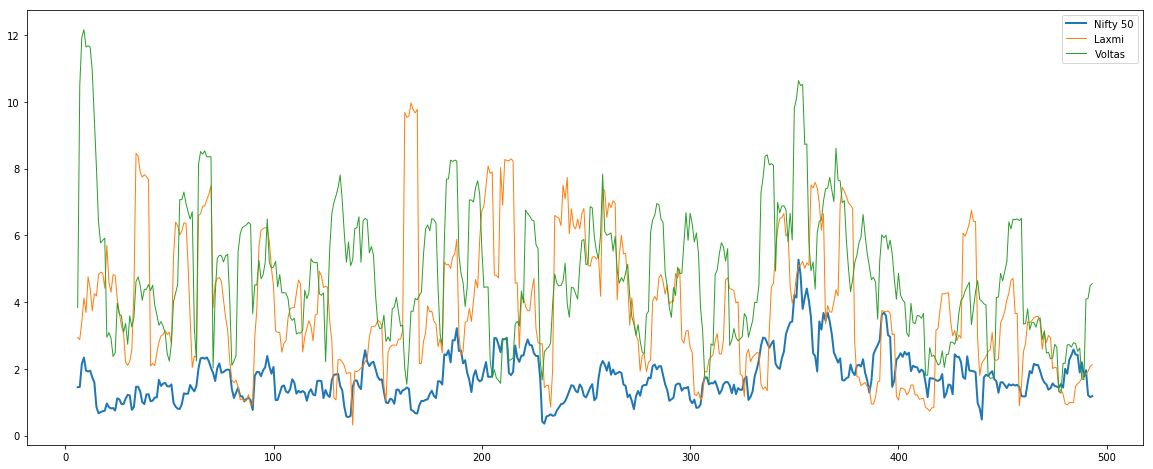

In [0]:
plt.figure(figsize=(20, 8))
ax1= plt.plot(data_corr_change['MA_7_Nifty'], label='Nifty 50', lw= 2)
ax2= plt.plot(data_corr_change['MA_7_Laxmi'], label='Laxmi', lw=1)
ax3= plt.plot(data_corr_change['MA_7_Voltas'], label='Voltas', lw=1)
plt.legend(loc=1)



---


## Query 2.9 

    Trade Calls - Using Simple Moving Averages. Study about moving averages here. 
 
    Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
    Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
    One of the most widely used technical indicators.

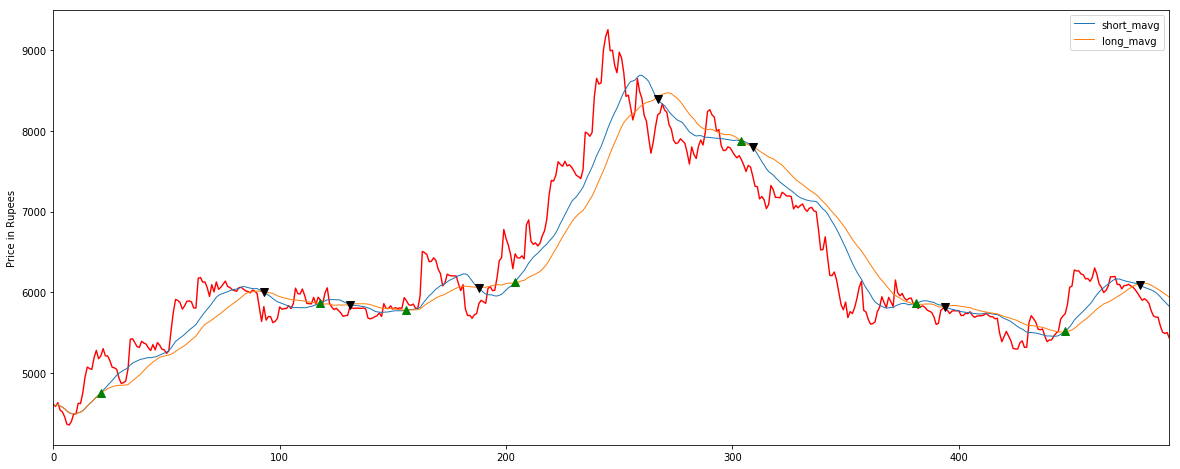

In [0]:
# Initialize the short and long windows
short_window = 21
long_window = 34

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index= data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = data['Close Price'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = data['Close Price'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in Rupees')

# Plot the closing price
data['Close Price'].plot(ax=ax1, color='r', lw=1.4)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=1)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=8, color='g')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=8, color='k')
         
# Show the plot
plt.show()



---


## Query 2.10 

    Trade Calls - Using Bollinger Bands 
    Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
    The bollinger bands comprise the following data points- 
    
    -- The 14 day rolling mean of the closing price (we call it the average) 
    -- Upper band which is the rolling mean + 2 standard deviations away from the average. 
    -- Lower band which is the rolling mean - 2 standard deviations away from the average. 
    -- Average Daily stock price.
    
    Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
    Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
    Save to a new csv file. 

In [0]:
band_dur= 14
no_of_std= 2

bollinger_data = pd.DataFrame(index= data.index)

rolling_mean = data['Close Price'].rolling(window= band_dur).mean()
rolling_std = data['Close Price'].rolling(window= band_dur).std()

bollinger_data['Rolling_Avg']= rolling_mean

bollinger_data['High'] = rolling_mean + (rolling_std * no_of_std)
bollinger_data['Low'] = rolling_mean - (rolling_std * no_of_std) 

bollinger_data['avg'] = data['Average Price']

In [0]:
bollinger_data= bollinger_data.dropna(0)

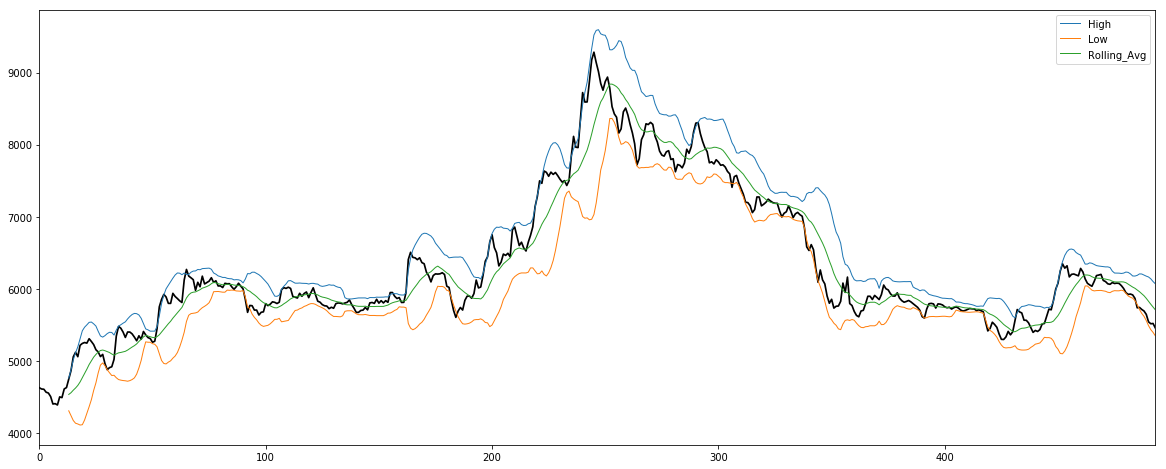

In [0]:
fig = plt.figure()
f
# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111)

# Plot the closing price
data['Average Price'].plot(ax=ax1, color='k', lw=1.7)

# Plot the short and long moving averages
bollinger_data[['High', 'Low', 'Rolling_Avg']].plot(ax=ax1, lw=1)